In [81]:
import sys
import nltk

nltk.download('averaged_perceptron_tagger')
!{sys.executable} -m pip install wordcloud

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aniru\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [255]:
import pandas as pd
import preprocessor.api as p
import string
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk import word_tokenize, FreqDist
from wordcloud import WordCloud

df = pd.read_csv('2018_companies_raw.csv')
clean = []
for i,v in enumerate(df['captions']):
    temp = p.clean(str(v))
    clean.append(temp)
df['clean'] = clean

In [256]:
tokenizer = TweetTokenizer()
df['clean'] = df.clean.apply(lambda x:  tokenizer.tokenize(x.lower()))

In [257]:
punc = []
for i in df.clean:
    no_punc = [''.join(c for c in s if c not in string.punctuation) for s in i]
    punc.append(no_punc)
df['clean'] = punc

In [258]:
stop_words = stopwords.words('english')
stop_words.extend(['link', 'bio', 'foodstagram', 'foodblogger',
                   'foodblogger', 'travelblogger', 'tag', 'picoftheday',
                   'instadaily', 'like', 'follow', 'discount', 'game',
                   'tsp', 'tbsp', '[', ']', 'na', 'teaspoon', 'get', 'us'
                   'food', 'time', 'recipe', 'de', 'well', 'little', 'love',
                   'make', 'day', 'order', 'today', 'delivery', 'dinner', 'meal'
                   'im', 'dont', 'try', 'sunday', 'need', 'ingredients', 'saturday'
                   'weekend', 'place', 'want', 'think', 'lunch', 'bowl', 'dish',
                   'help', 'perfect', 'week', 'home', 'post', "'i'm", 'cup', 'month',
                   'mix', 'right', 'monday', 'shop', 'call', 'days', 'orders', 'march'
                   'meals'])

In [259]:
def remove_stopwords(text):
    words = [w for w in text if w not in stop_words]
    return words

In [260]:
def flatten(it):
    comb = []
    for i in it:
        comb.extend(i)
    return comb

In [261]:
df['clean'] = df.clean.apply(lambda x: remove_stopwords(x))

In [262]:
flat = flatten(df['clean'])
flat_noempties = [x for x in flat if x]

In [263]:
is_noun = lambda pos: pos[:2] == 'NN'

nn = []
for i in flat_noempties:
    tokenized = nltk.word_tokenize(str(i))
    nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)]
    nn.append(nouns)

In [264]:
nn_flat = flatten(nn)

In [265]:
fdist = FreqDist(nn_flat)
fdist.most_common(20)

[('box', 429),
 ('chicken', 313),
 ('meal', 280),
 ('meals', 210),
 ('food', 203),
 ('feast', 200),
 ('rice', 197),
 ('vegan', 171),
 ('im', 161),
 ('curry', 158),
 ('boxes', 152),
 ('sauce', 143),
 ('salad', 128),
 ('gousto', 126),
 ('tasty', 116),
 ('cheese', 115),
 ('cook', 113),
 ('beef', 112),
 ('recipes', 110),
 ('tonight', 107)]

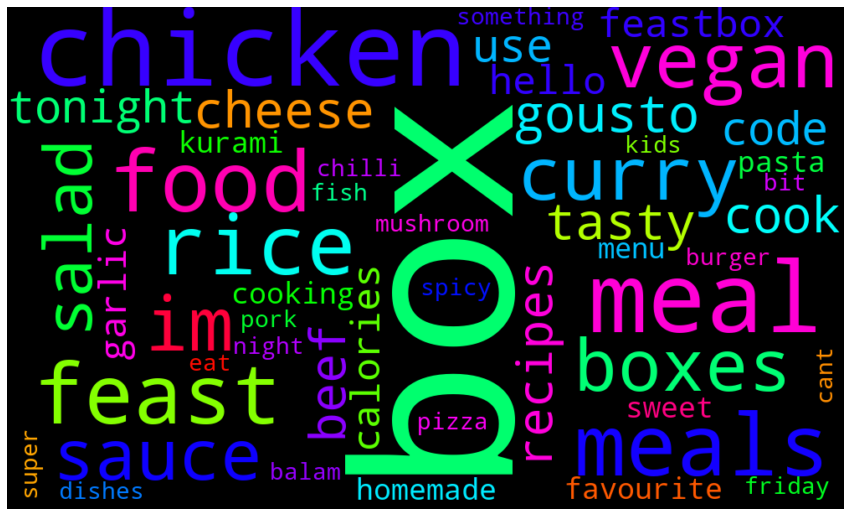

In [266]:
wc = WordCloud(collocations=True, width=1000, height=600, background_color='black', colormap='hsv', max_words=50).generate_from_frequencies(fdist)
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()